# Assignment : Regression

1. What is Simple Linear Regression?
  - Simple Linear Regression is a statistical method used to model the relationship between two continuous variables: one independent variable (predictor) and one dependent variable (response). It assumes a linear relationship of the form:
  
    Y=β0+β1X+ϵY
    
    where:

    - Y is the dependent variable,

    - X is the independent variable,

    - β0 is the intercept,

    - β1 is the slope (change in Y per unit change in X),

    - ϵ is the error term.

2. What are the key assumptions of Simple Linear Regression?
  - Linearity: The relationship between the independent and dependent variable is linear.

  - Independence: Observations are independent of each other.

  - Homoscedasticity: Constant variance of errors across values of the independent variable.

  - Normality of errors: The residuals (errors) are normally distributed.

  - No multicollinearity: Although not relevant for simple regression (only one predictor), it applies in multiple regression.

3. What is heteroscedasticity, and why is it important to address in regression models?
  - Heteroscedasticity refers to the situation where the variance of residuals (errors) is not constant across all levels of the independent variable. It violates the assumption of homoscedasticity.
    
    Importance:

    - Leads to inefficient estimates and biased standard errors.
    - Affects the validity of hypothesis tests (like t-tests and F-tests).
    - May result in misleading p-values and confidence intervals.

4. What is Multiple Linear Regression?
  - Multiple Linear Regression is an extension of simple linear regression where two or more independent variables are used to predict the dependent variable. The model is of the form:

      Y=β0+β1X1+β2X2+...+βnXn+ϵY

    It helps understand the effect of several predictors on the outcome simultaneously.

5. What is polynomial regression, and how does it differ from linear regression?
  - Polynomial regression is a type of regression that models the relationship between the independent variable and the dependent variable as an nth degree polynomial:

      Y=β0+β1X+β2X2+...+βnXn+ϵY
  
    Difference:
    - Linear regression fits a straight line; polynomial regression fits a curve.

    - Polynomial regression can capture non-linear trends in the data.


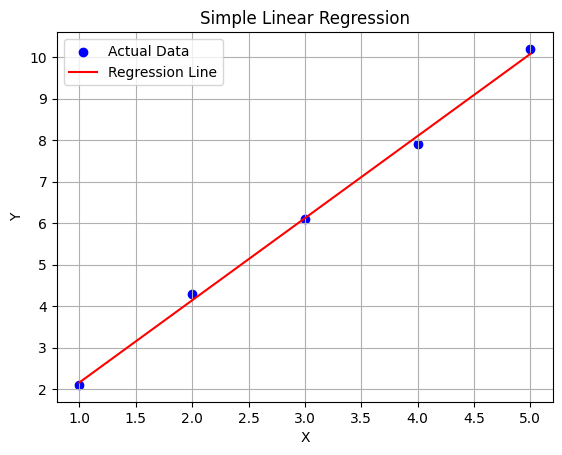

Intercept: 0.18
Slope: 1.98


In [2]:
# 6. Implement a Python program to fit a Simple Linear Regression model to the following sample data:
# X = [1, 2, 3, 4, 5]
# Y = [2.1, 4.3, 6.1, 7.9, 10.2]
# Plot the regression line over the data points.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Create and train model
model = LinearRegression()
model.fit(X, Y)

# Predict values
Y_pred = model.predict(X)

# Plot original data and regression line
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# Output the model parameters
print(f"Intercept: {model.intercept_:.2f}")
print(f"Slope: {model.coef_[0]:.2f}")


In [3]:
# 7. Fit a Multiple Linear Regression model on this sample data:
# Area = [1200, 1500, 1800, 2000]
# Rooms = [2, 3, 3, 4]
# Price = [250000, 300000, 320000, 370000]
# Check for multicollinearity using VIF and report the results.

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sample Data
data = pd.DataFrame({
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
})

# Features and target
X = data[['Area', 'Rooms']]
y = data['Price']

# Fit Multiple Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Model Coefficients
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficients: {dict(zip(X.columns, model.coef_))}")

# Add constant column for VIF calculation
X_with_const = pd.concat([pd.Series([1]*len(X), name="Intercept"), X], axis=1)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_const.values, i)
                   for i in range(X_with_const.shape[1])]

print("\nVariance Inflation Factor (VIF) values:")
print(vif_data)


Intercept: 103157.89
Coefficients: {'Area': np.float64(63.15789473684211), 'Rooms': np.float64(34736.842105263146)}

Variance Inflation Factor (VIF) values:
     Feature        VIF
0  Intercept  34.210526
1       Area   7.736842
2      Rooms   7.736842


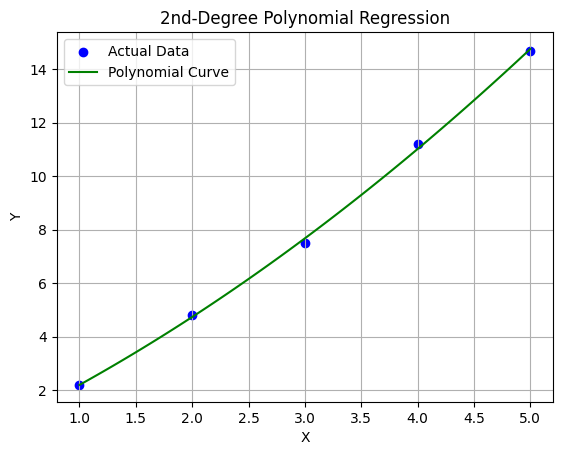

Intercept: 0.06
Coefficients: [0.   1.94 0.2 ]


In [4]:
# 8. Implement polynomial regression on the following data:
# X = [1, 2, 3, 4, 5]
# Y = [2.2, 4.8, 7.5, 11.2, 14.7]
# Fit a 2nd-degree polynomial and plot the resulting curve.


import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Sample Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Create 2nd-degree polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit Polynomial Regression Model
model = LinearRegression()
model.fit(X_poly, Y)

# Predict values
X_range = np.linspace(1, 5, 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
Y_pred = model.predict(X_range_poly)

# Plot
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X_range, Y_pred, color='green', label='Polynomial Curve')
plt.title('2nd-Degree Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# Output Model Coefficients
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficients: {model.coef_}")


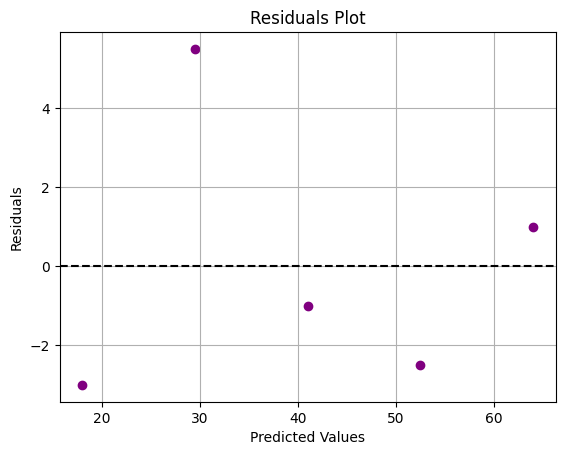

Predicted values: [18.  29.5 41.  52.5 64. ]
Residuals: [-3.   5.5 -1.  -2.5  1. ]


In [5]:
# 9.  Create a residuals plot for a regression model trained on this data:
# X = [10, 20, 30, 40, 50]
# Y = [15, 35, 40, 50, 65]
# Assess heteroscedasticity by examining the spread of residuals.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Given data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Fit Linear Regression
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

# Calculate residuals
residuals = Y - Y_pred

# Plot residuals
plt.scatter(Y_pred, residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Residuals Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# Print residuals for analysis
print("Predicted values:", Y_pred)
print("Residuals:", residuals)


10. Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.
  - As a data scientist detecting heteroscedasticity and multicollinearity, I would take the following steps:

      To handle Heteroscedasticity:

      - Apply Log/Box-Cox transformation to the dependent variable to stabilize variance.
      - Use Weighted Least Squares (WLS) regression instead of Ordinary Least Squares (OLS).
      - Consider robust standard errors to get valid statistical inference even with heteroscedasticity.
      - Visualize residual plots to verify improvement.

      To handle Multicollinearity:

      - Check Variance Inflation Factor (VIF); if VIF > 5 or 10, it's a concern.
      - Remove or combine correlated features (e.g., use PCA or domain knowledge).
      - Use regularization methods like:
        - Ridge Regression (L2 penalty)
        - Lasso Regression (L1 penalty) for feature selection
      - Standardize features before applying regularized models.

    Together, these techniques ensure a more stable, interpretable, and generalizable model.
